<a href="https://colab.research.google.com/github/Himansh-tech/epithelialDefect/blob/main/EpithelialCorrectFilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
input_folder = '/content/data'
output_folder = r"C:\Users\Himanshu\Desktop\Output"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Defining color thresholds for isolating green areas in HSV color space
lower_green = np.array([40, 50, 50])  # Adjust for the green hue in your images
upper_green = np.array([90, 255, 255])
#HSV:Hue, Saturation, Value range for green color

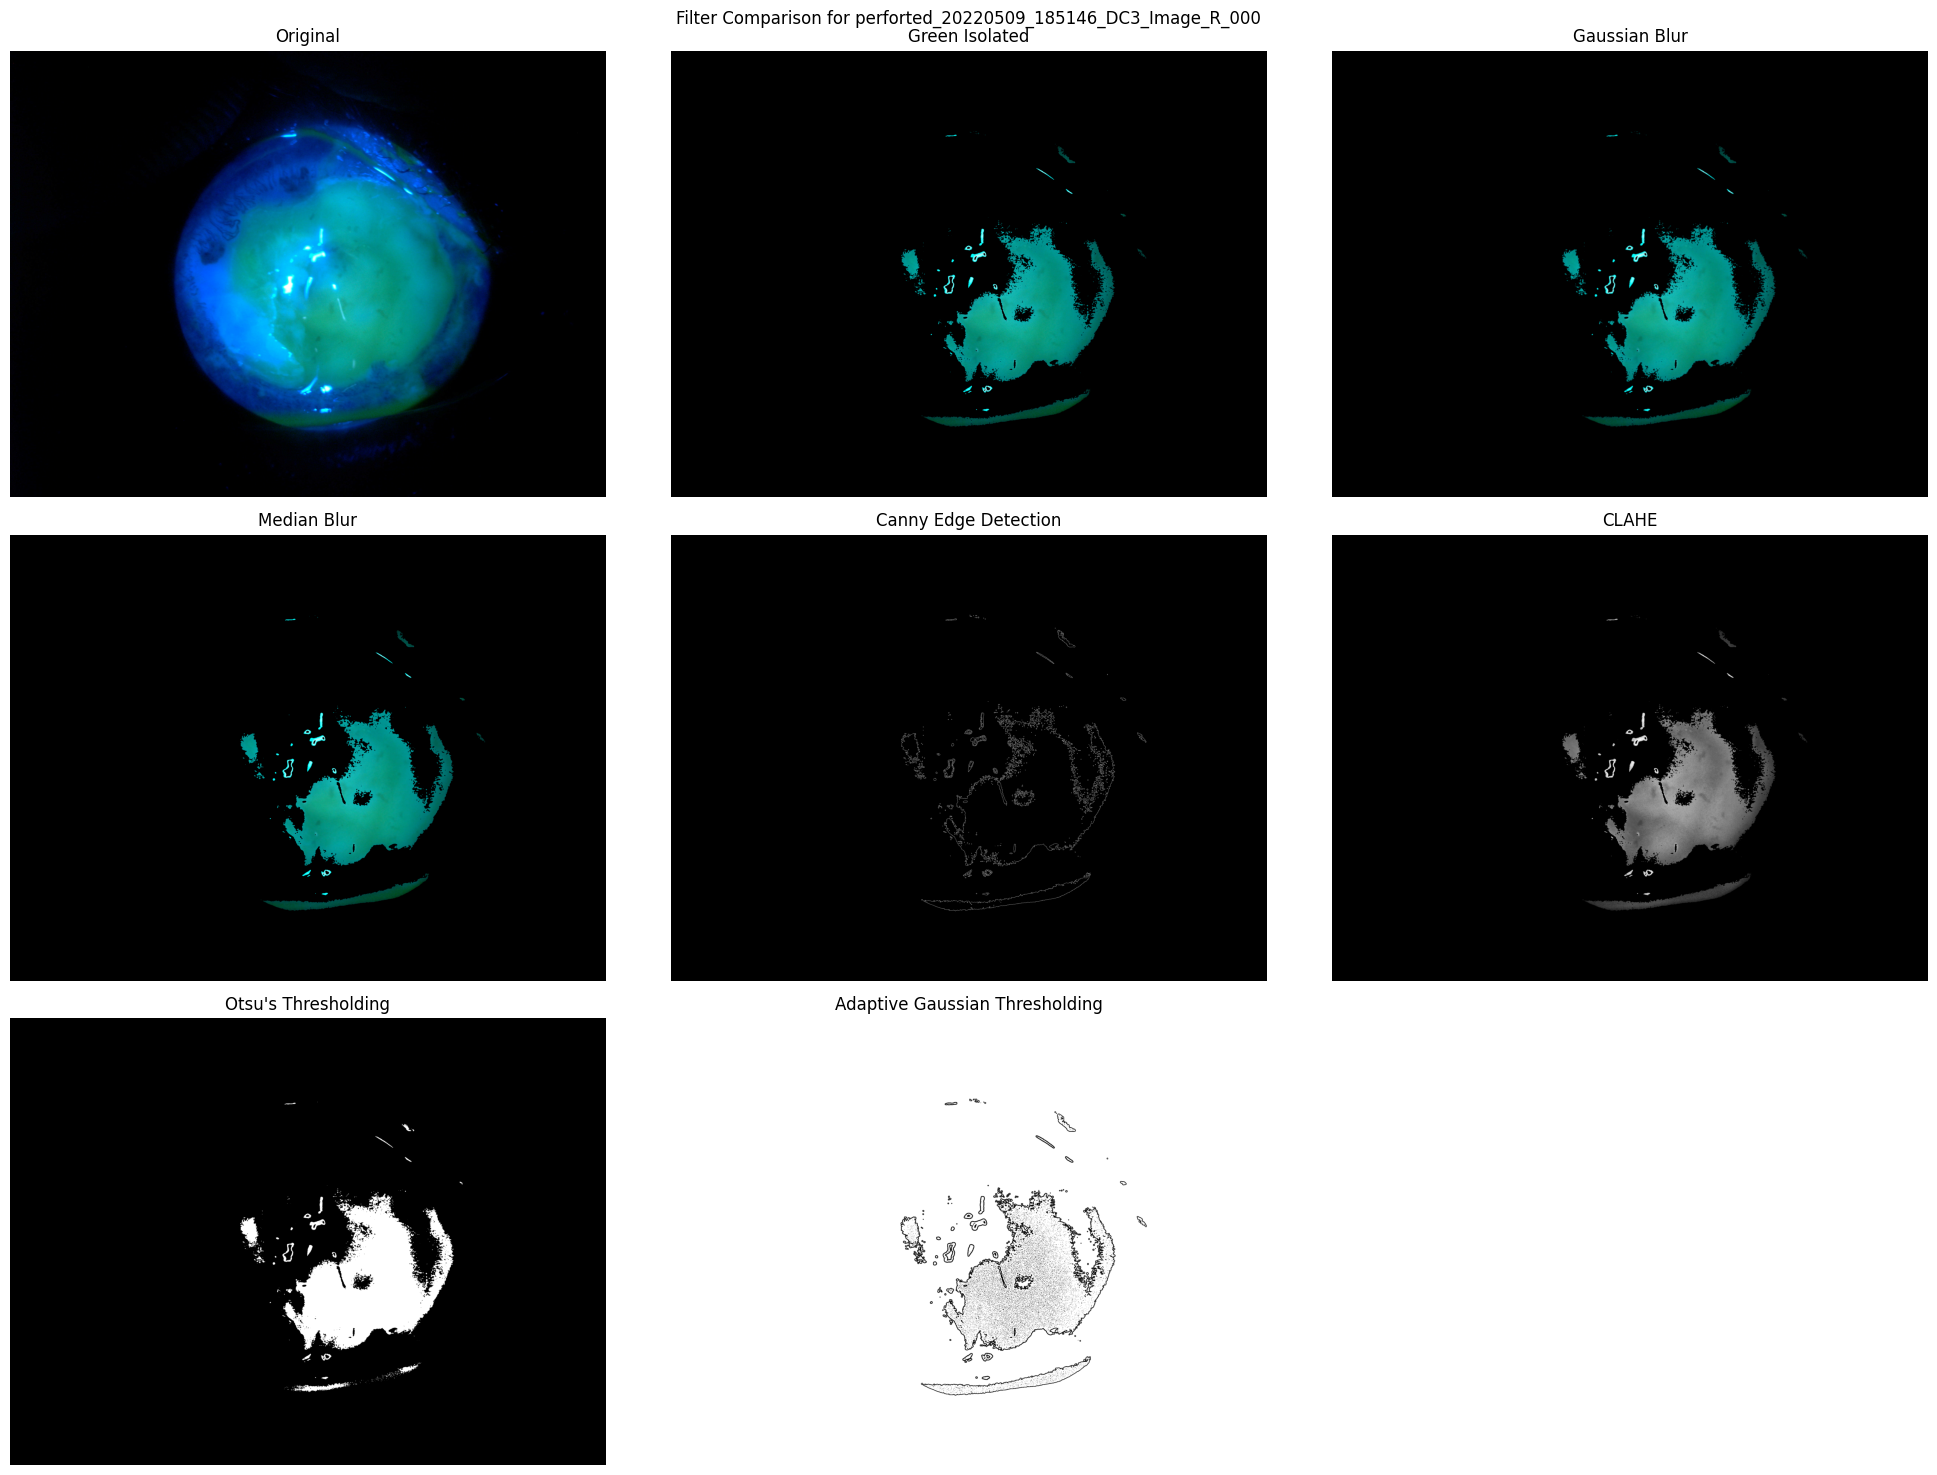

In [ ]:
def apply_filters(image, image_name):
    # Convert to RGB and HSV
    #by default opencv works on BGR and Matplotlib works on RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Apply mask to isolate green areas

    #The cv2.inRange function checks each pixel in an image to see if it falls
    # within a specified range of values for each channel (e.g., HSV or RGB channels).
    # If a pixel's values are within the specified range:
    #It sets the corresponding pixel in the output mask to 255 (white), indicating that this
    #pixel is "in range."
    #If a pixel falls outside the range, it sets that pixel to 0 (black) in the mask.

    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    green_isolated = cv2.bitwise_and(image, image, mask=mask)











#har ek filter kya kya kar rha hai wo dekh le and baki niche ka code dekh









    #blur's used here are built-in in open cv
    filtered_images = {
        "Original": image,
        "Green Isolated": green_isolated,

        "Gaussian Blur": cv2.GaussianBlur(green_isolated, (5, 5), 0),
        "Median Blur": cv2.medianBlur(green_isolated, 5),
        "Canny Edge Detection": cv2.Canny(green_isolated, 50, 150),
        "CLAHE": cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(cv2.cvtColor(green_isolated, cv2.COLOR_BGR2GRAY)),
        "Otsu's Thresholding": cv2.threshold(cv2.cvtColor(green_isolated, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        "Adaptive Gaussian Thresholding": cv2.adaptiveThreshold(cv2.cvtColor(green_isolated, cv2.COLOR_BGR2GRAY), 255,
                                                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    }
    #all filters are over


    plt.figure(figsize=(20, 15))
    for i, (title, filtered_image) in enumerate(filtered_images.items()):
        plt.subplot(3, 3, i + 1)
        if title in ["CLAHE", "Otsu's Thresholding", "Adaptive Gaussian Thresholding"]:
            plt.imshow(filtered_image, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')


        output_image_path = os.path.join(output_folder, f"{image_name}_{title}.png")
        if title in ["CLAHE", "Otsu's Thresholding", "Adaptive Gaussian Thresholding"]:
            cv2.imwrite(output_image_path, filtered_image)
        else:
            cv2.imwrite(output_image_path, cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

    plt.suptitle(f"Filter Comparison for {image_name}")
    plt.tight_layout()
    plt.show()


for image_name in os.listdir(input_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            apply_filters(image, os.path.splitext(image_name)[0])